https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/

In computer vision, image segmentation is the process of partitioning a digital image into multiple segments (sets of pixels also known as image objects).

More precisely, image segmetnatiom is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics

The goal of segmentation is to simplify and or change the representation of an image into something that is more meaningful and easier to analyze

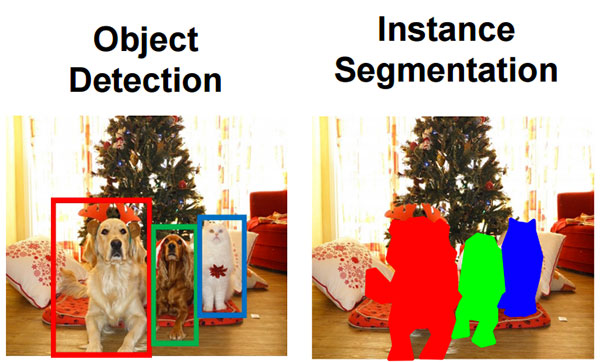

# Region-based Segmentation

One simple way to segment different objects could be to use their pixel values

In this case, we can set a threshold value. The pixel values falling below or above that threshold can be classified accordingly (as an object or the background). This technique is known as <b>Threshold Segmentation.

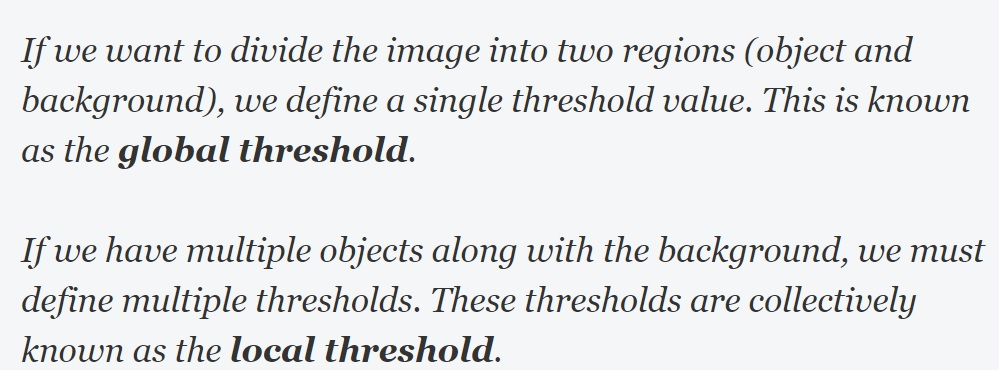

In [2]:
import numpy as np 

import cv2 
from scipy import ndimage
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

%matplotlib inline  
#your matplotlib graphs will be included in your notebook, next to the code


In [3]:
# img_C = cv2.imread("images/test_image.jpeg")  #remember cv2 reads as GBR 
img_P = plt.imread("images/kite.jpg")   #plt reads as RGB

In [11]:
#using cv2 

print(img_C.shape)
cv2.imshow("image_test",img_C)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'img_C' is not defined

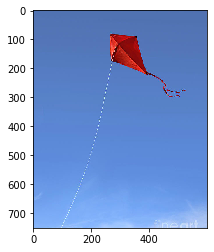

In [13]:
#using matplot 

plt.imshow(img_P)

#Using matplotlib for this tutorial

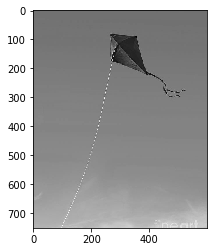

In [14]:
gray = rgb2gray(img_P)
plt.imshow(gray, cmap='gray')

Now, we want to apply a certain threshold to this image. This threshold should separate the image into two parts – the foreground and the background

We will take the mean of the pixel values and use that as a threshold. If the pixel value is more than our threshold, we can say that it belongs to an object. If the pixel value is less than the threshold, it will be treated as the background

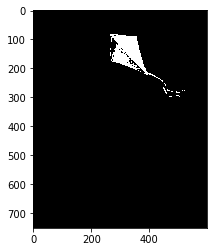

In [70]:
gray = rgb2gray(img_P)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])

for i in range(gray_r.shape[0]):
    if gray_r[i] > 0.3:
        gray_r[i] = 0
    else:
        gray_r[i] = 1
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [67]:
gray

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

Nice! The darker region (black) represents the background and the brighter (white) region is the foreground. We can define multiple thresholds as well to detect multiple objects:

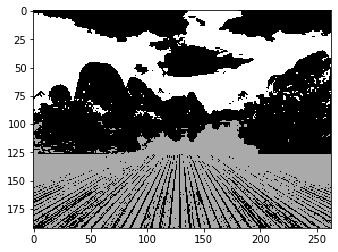

In [18]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

# Edge Detection Segmentation

Edges in images are areas with strong intensity contrasts; a jump in intensity from one pixel to the next

To do that we can make use of filters and convolutions === We wil luse <b>Sober </b> filters to detect the edge

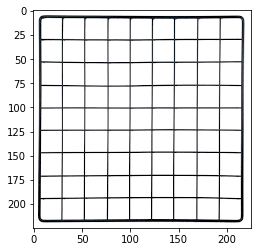

In [4]:
image = plt.imread("Images/index.png")
plt.imshow(image)

It should be fairly simple for us to understand how the edges are detected in this image. Let’s convert it into grayscale and define the sobel filter (both horizontal and vertical) that will be convolved over this image:

In [5]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')


[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [6]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

In [48]:
l = np.array([[1,2,0,0],[5,3,0,4],[0,0,0,7],[9,3,0,0]])

In [52]:
sobel_vertical = np.array([np.array([1,1,1]), np.array([1,1,0]), np.array([1, 0,0])])
ndimage.convolve(l, sobel_vertical, mode='reflect')


array([[18, 10,  7,  8],
       [10,  3, 11, 22],
       [24, 12, 14, 18],
       [33, 15, 10,  7]])

In [46]:
l

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [40]:
sobel_vertical

array([[ 1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

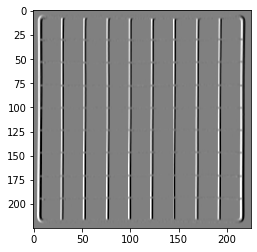

In [27]:
plt.imshow(out_v, cmap='gray')


there is another filter that can detect both horizontal and vertical at the same time  = Laplace operator

In [29]:
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


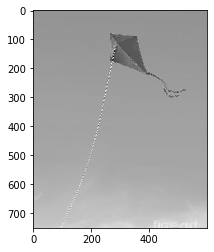

In [16]:
from scipy import ndimage

gray = rgb2gray(img_P)
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -4, 1]), np.array([1, 1, 1])])
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

In [8]:
gray

array([[0.43653843, 0.43653843, 0.43653843, ..., 0.43147804, 0.43147804,
        0.43147804],
       [0.43653843, 0.43653843, 0.43653843, ..., 0.43147804, 0.43147804,
        0.43147804],
       [0.43653843, 0.43653843, 0.43653843, ..., 0.43147804, 0.43147804,
        0.43147804],
       ...,
       [0.68986392, 0.68986392, 0.68986392, ..., 0.7554949 , 0.7554949 ,
        0.7554949 ],
       [0.69183608, 0.69183608, 0.69183608, ..., 0.75466157, 0.75466157,
        0.75466157],
       [0.69183608, 0.69183608, 0.69183608, ..., 0.75886588, 0.75886588,
        0.75886588]])

In [9]:
out_l

array([[1.74615373, 1.74615373, 1.74615373, ..., 1.72591216, 1.72591216,
        1.72591216],
       [1.74615373, 1.74615373, 1.74615373, ..., 1.72591216, 1.72591216,
        1.72591216],
       [1.74615373, 1.74615373, 1.74615373, ..., 1.72591216, 1.72591216,
        1.72591216],
       ...,
       [2.76537216, 2.76537216, 2.76537216, ..., 3.03124431, 3.03124431,
        3.03124431],
       [2.76142784, 2.76142784, 2.76142784, ..., 3.03375922, 3.03375922,
        3.03375922],
       [2.76734431, 2.76734431, 2.76734431, ..., 3.02285059, 3.02285059,
        3.02285059]])

# Image Segmentation based on Clustering


Clustering techniques to divide images into segments

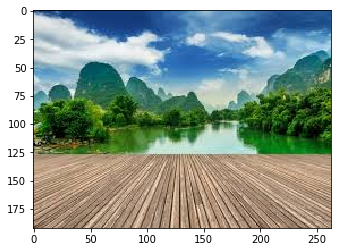

In [17]:
pic = plt.imread("images/test_image.jpeg")/255   #plt reads as RGBprint(pic.shape)
plt.imshow(pic)

It’s a 3-dimensional image of shape (192, 263, 3). For clustering the image using k-means, we first need to convert it into a 2-dimensional array whose shape will be (length*width, channels)

In [20]:
# It’s a 3-dimensional image For clustering the image using k-means, 
# we first need to convert it into a 2-dimensional array whose shape will be (length*width, channels)
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2]) 
pic_n.shape

(50496, 3)

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

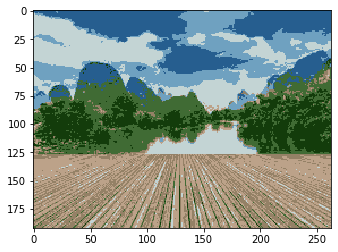

In [23]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)